# Mesh 1

Density function in `refinter.f90`

    real (r8) function densf(x) result(dens_f)
        real (r8), dimension(1:2), intent(in) :: x
        real (r8), dimension(1:3) :: p
        real (r8) :: lat
        real (r8) :: lon
        real (r8) :: latc
        real (r8) :: lonc
        real (r8) :: radiuse
        real (r8) :: slope
        real (r8) :: epsilons
        real (r8) :: dists
        real (r8) :: maxdist
        real (r8) :: sx

        !Density function parameters
        ! (increase_of_resolution) / (distance)
        slope = 15._r8/500._r8
        ! radius (in km) of high resolution area
        maxdist = 50._r8
        ! distance (in km) of transition zone belt: ratio / slope
        epsilons = 150._r8/slope
        if(epsilons > 10000._r8)then
            epsilons = 10000._r8
        end if

        ! x is the input; the function is called like densf([lat, lon])
        lat = x(1)
        lon = x(2)

        !Center of refined region is 0,-8.4559 in radians (center of pentagon)
        ! TODO cannot do latc=-8.4559
        latc=0._r8
        lonc=0._r8
        !Distance to center ()
        radiuse = 6367._r8
        dists = radiuse * 2 * dasin(dsqrt(dsin((latc - lat) / 2._r8)**2 + dcos(lat) * dcos(latc) * dsin ((lonc-lon) / 2._r8)**2))

        !Distance to center metric
        sx=(dists-maxdist)*slope

        !Set density
        if(dists<=maxdist)then
            !Point close to the center
            dens_f=1.0
        elseif((dists<=maxdist+epsilons) .and. (dists>maxdist))then
            !Point in the transition
            dens_f=1.0 + sx
        else
            !Point far from the center
            dens_f=1.0 + epsilons*slope
        end if

        !Normalization - Make it in [0,1]
        dens_f = 1.0 / dens_f**2
    end function densf


In [1]:
import os.path

name_test = 'mesh1'

args_mesh = {'mesh1': {
    'slope': 15./500,
    'gammas': 150.,
    'maxdist': 50.,
    'maxepsilons': 10000.
}}

Needed cells for lower resolution 1km
97351.16013370738
Number smaller than 15km
44841


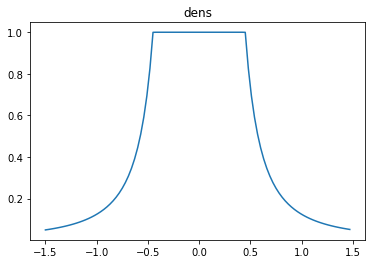

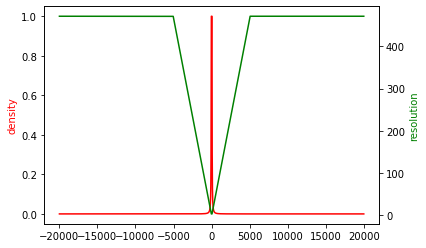

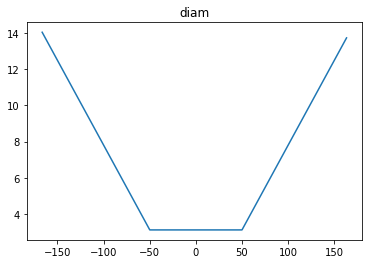

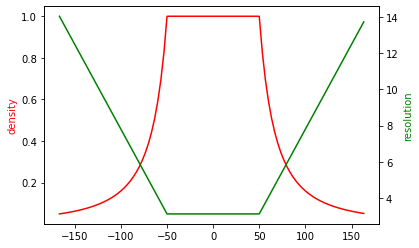

In [2]:
from meshes_funcs import dens2res
res = dens2res(10000, step=0.03, **args_mesh[name_test])


LEVEL 3 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


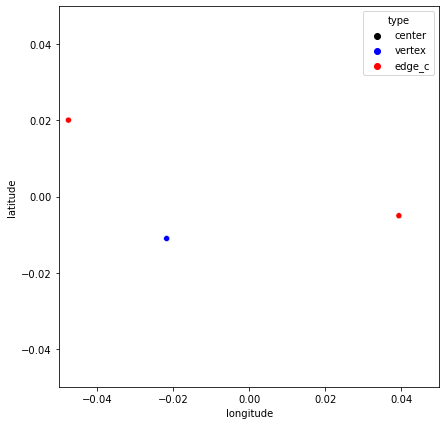

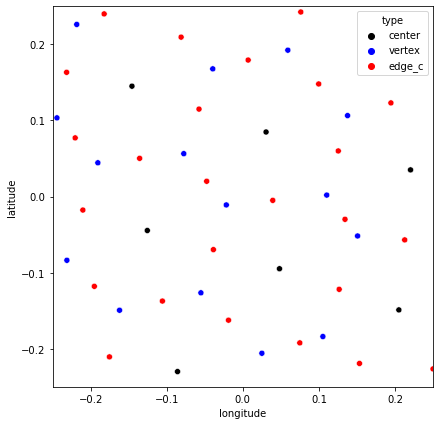

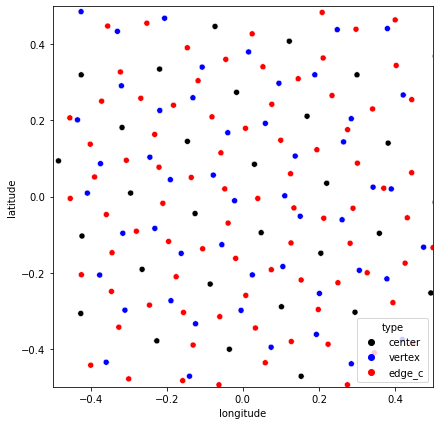

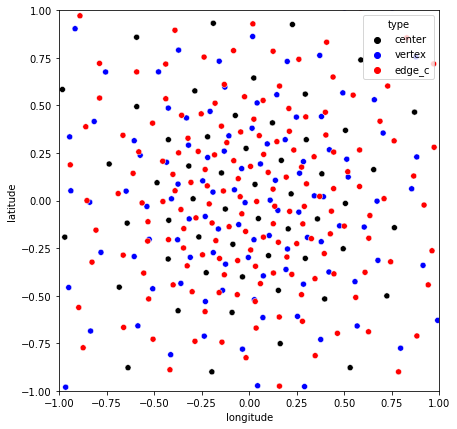

LEVEL 4 MESH
Reading MPAS mesh and loading lats&lons
center
Keyword: Cell
           latCell      lonCell     latitude    longitude
count  2562.000000  2562.000000  2562.000000  2562.000000
mean      0.000189    -0.002260     0.010840    -0.129466
std       0.547470     1.427192    31.367730    81.772072
min      -1.541837    -3.139096   -88.340736  -179.856967
25%      -0.258810    -0.614820   -14.828729   -35.226618
50%      -0.000149    -0.000313    -0.008560    -0.017951
75%       0.270662     0.617484    15.507795    35.379232
max       1.528226     3.138030    87.560876   179.795850
vertex
Keyword: Vertex
         latVertex    lonVertex     latitude    longitude
count  5120.000000  5120.000000  5120.000000  5120.000000
mean      0.000196     0.002818     0.011243     0.161466
std       0.547472     1.426505    31.367855    81.732698
min      -1.546620    -3.139750   -88.614803  -179.894437
25%      -0.268867    -0.608477   -15.404931   -34.863180
50%       0.000060     0.000131  

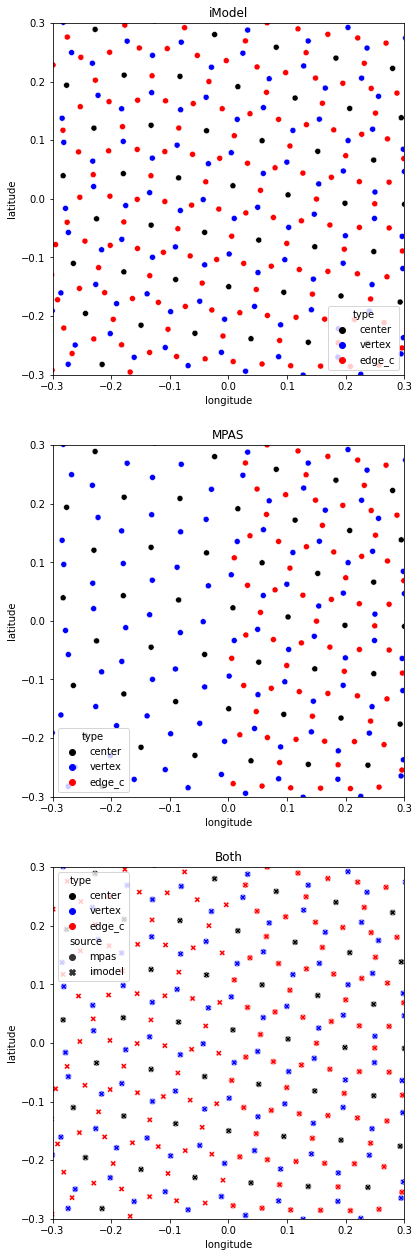

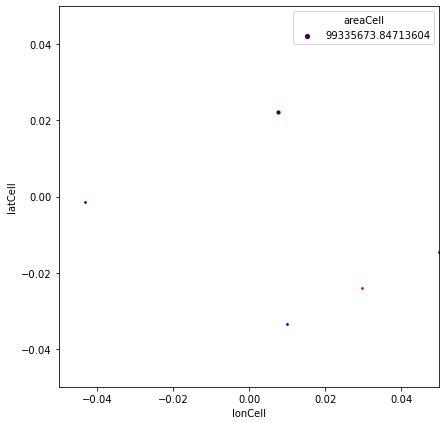

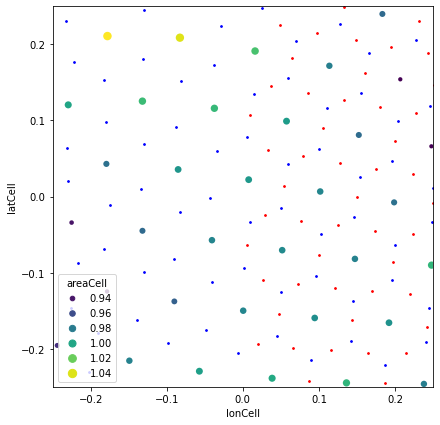

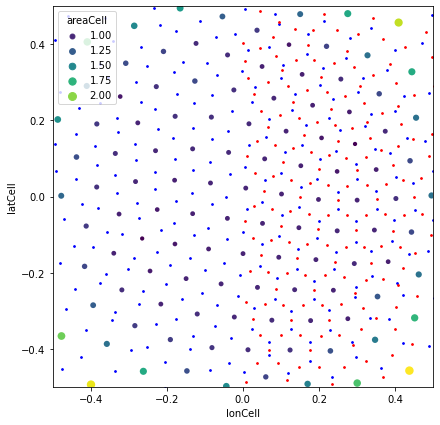

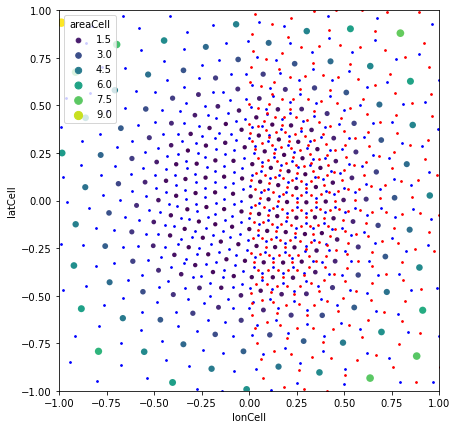

Rescale area to the Earth Sphere


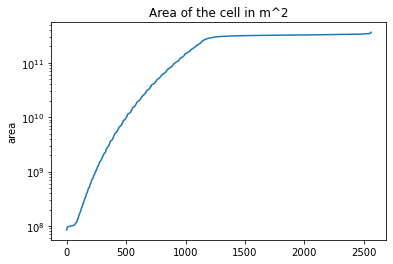

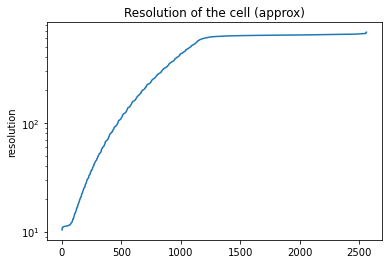

Number smaller than 15km: 
114.0
Resolution of the cell (approx)


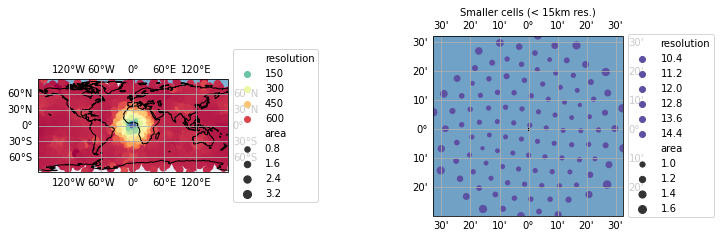

Different Radius


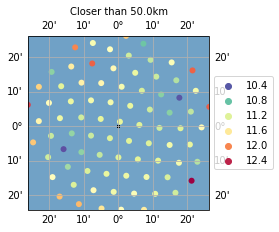

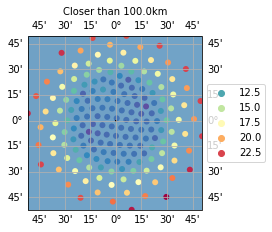

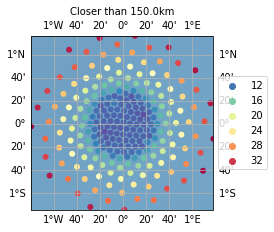

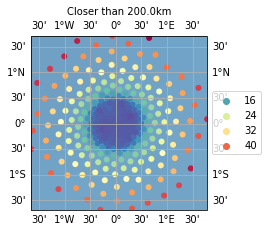

Different highest resolution
No cells with resolution lower than 3.0km
No cells with resolution lower than 5.0km
No cells with resolution lower than 10.0km


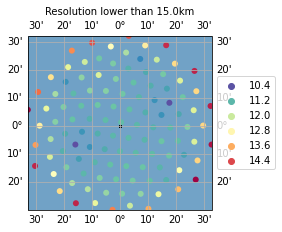

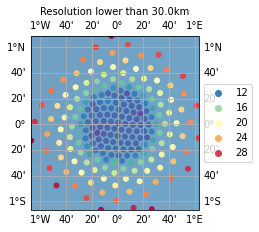

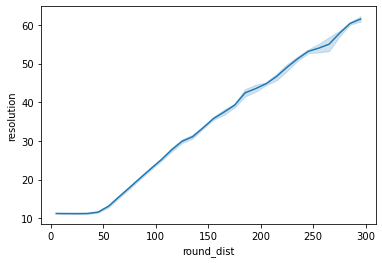

LEVEL 5 MESH
Reading MPAS mesh and loading lats&lons
center
Keyword: Cell
            latCell       lonCell      latitude     longitude
count  10242.000000  10242.000000  10242.000000  10242.000000
mean      -0.000343     -0.001327     -0.019656     -0.076044
std        0.549888      1.429641     31.506256     81.912417
min       -1.559923     -3.140391    -89.377021   -179.931164
25%       -0.271726     -0.631009    -15.568772    -36.154140
50%       -0.000207     -0.000148     -0.011883     -0.008487
75%        0.270411      0.631386     15.493430     36.175753
max        1.557524      3.141385     89.239565    179.988109
vertex
Keyword: Vertex
          latVertex     lonVertex      latitude     longitude
count  20480.000000  20480.000000  20480.000000  20480.000000
mean      -0.000342      0.001031     -0.019582      0.059086
std        0.549886      1.429747     31.506169     81.918477
min       -1.552774     -3.141142    -88.967425   -179.974196
25%       -0.269989     -0.629439  

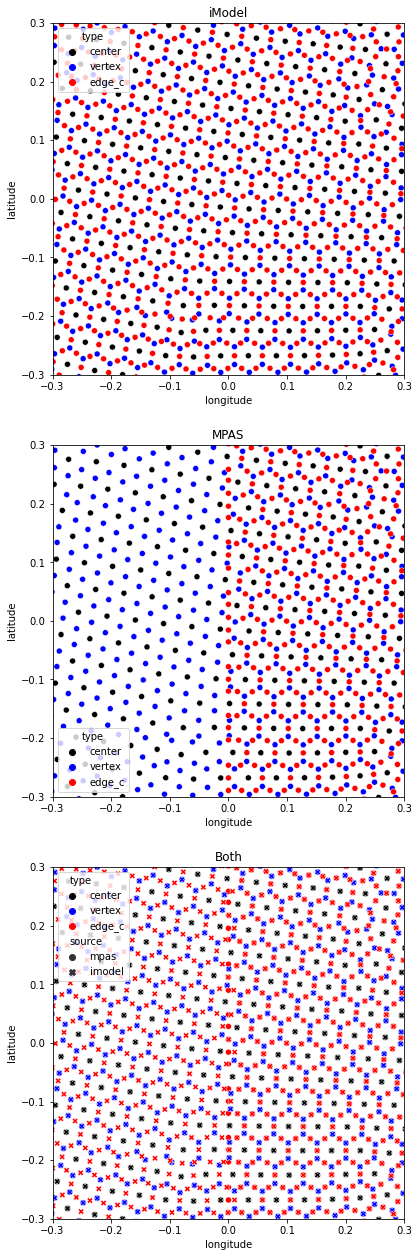

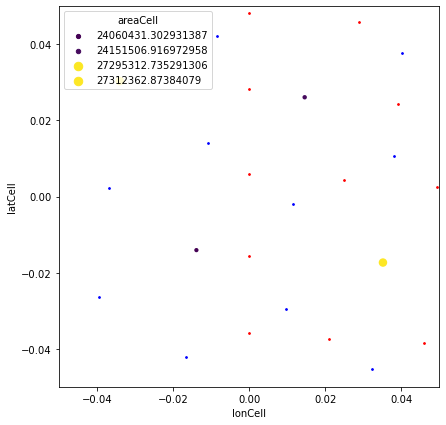

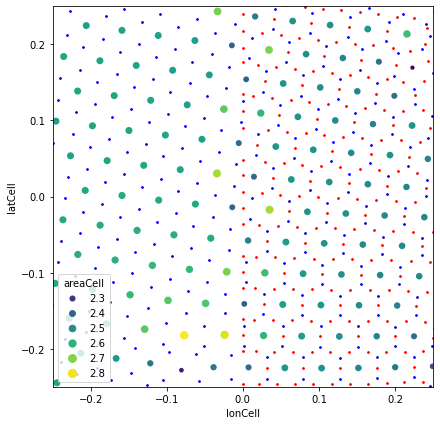

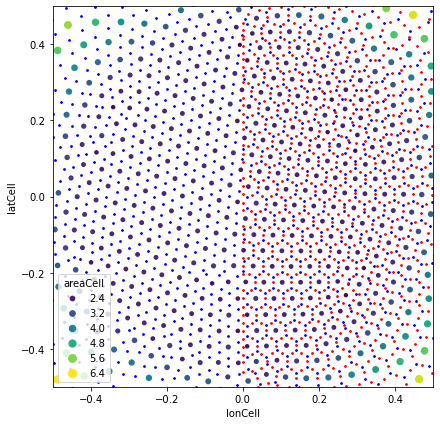

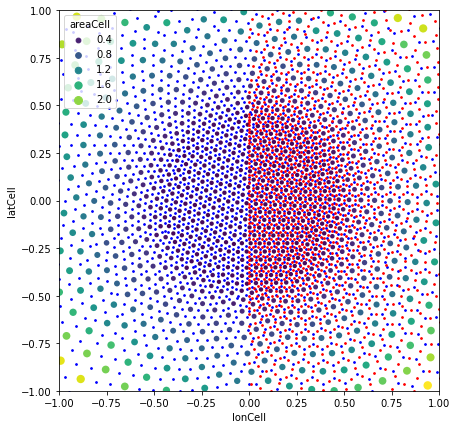

Rescale area to the Earth Sphere


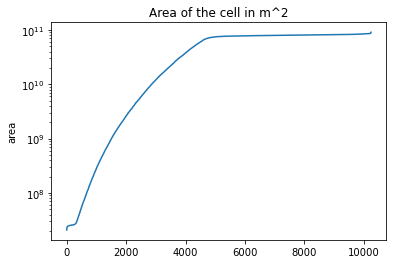

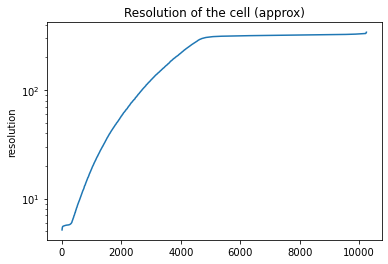

Number smaller than 15km: 
848.0
Resolution of the cell (approx)


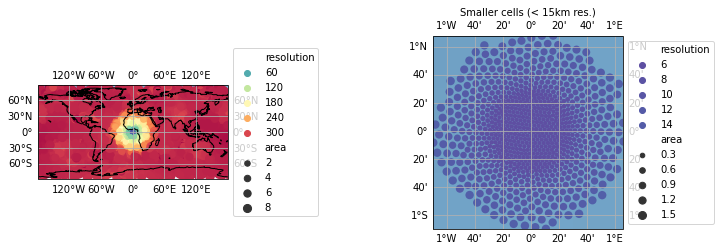

Different Radius


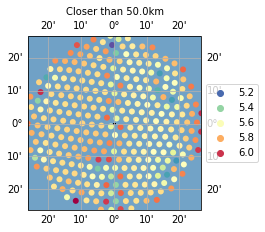

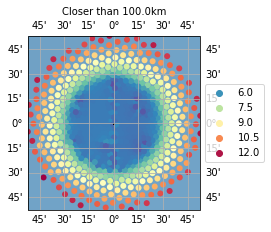

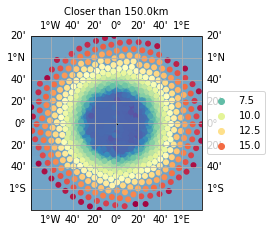

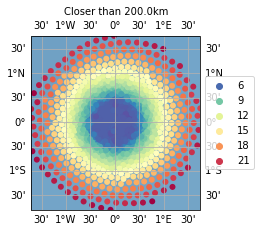

Different highest resolution
No cells with resolution lower than 3.0km
No cells with resolution lower than 5.0km


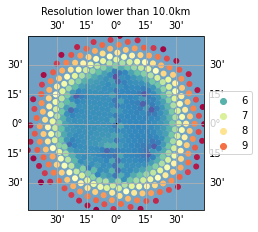

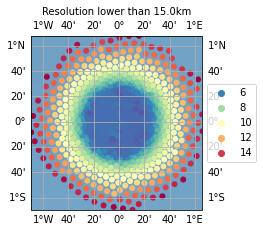

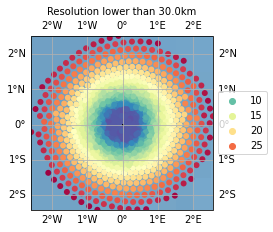

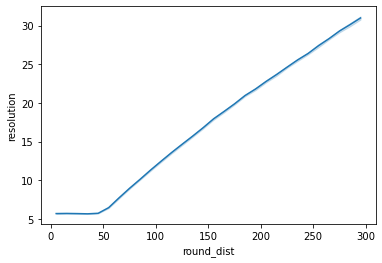

LEVEL 6 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


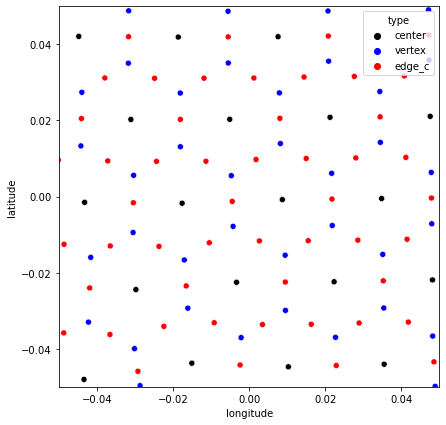

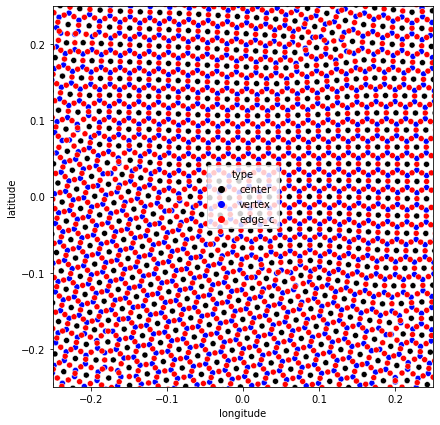

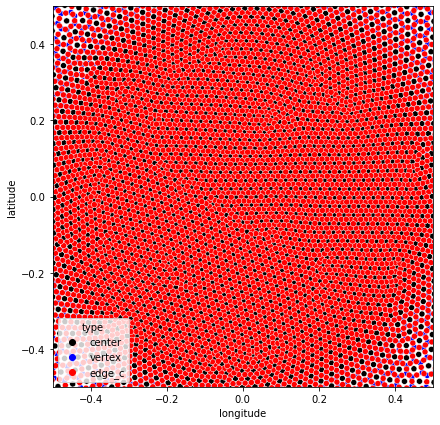

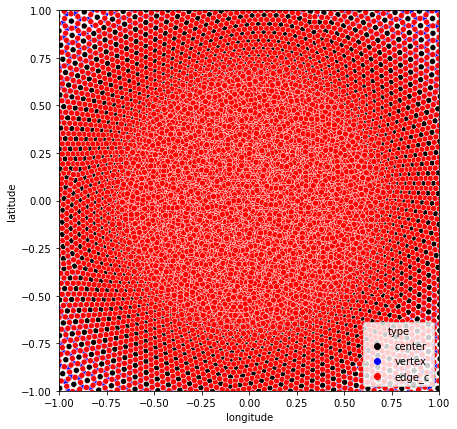

In [3]:
from meshes_funcs import study_mesh, center_hex_tr, \
    mpas_center_hex_tr, compare_imodel_mpas
import glob
import os

imodel_meshes = name_test + '/grids/'
files = sorted(glob.glob(name_test + '/meshes/*_grid.nc'))

lims = [0.05, 0.25, 0.5, 1]
for lev in ['3', '4', '5', '6']:

    print('LEVEL ' + lev + ' MESH')
    file = name_test + '/meshes/' + name_test + '-lev' + lev + '_grid.nc'
    if not os.path.exists(file):
        print('MPAS GRID NOT AVAILABLE')

        print('Plot iModel')
        for lim in lims:
            center_hex_tr(folder=imodel_meshes,
                          name='icos_ref_scvt_h1_' + lev,
                          lim=lim)
        continue

    compare_imodel_mpas(file,
                        imodel_meshes,
                        'icos_ref_scvt_h1_' + lev,
                        lim=0.3)

    for lim in lims:
        mpas_center_hex_tr(file, lim=lim)

    study_mesh(file)